In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import os

In [18]:
customer = pd.read_csv("G:/Data Science Recorded Lectures/case studies/3. Pandas Case Study 1 - Retail Case Study (1)/3. Pandas Case Study 1 - Retail Case Study/Customer.csv")
prod_info = pd.read_csv("G:/Data Science Recorded Lectures/case studies/3. Pandas Case Study 1 - Retail Case Study (1)/3. Pandas Case Study 1 - Retail Case Study/prod_cat_info.csv")
transaction = pd.read_csv("G:/Data Science Recorded Lectures/case studies/3. Pandas Case Study 1 - Retail Case Study (1)/3. Pandas Case Study 1 - Retail Case Study/Transactions.csv")

In [19]:
customer.shape

(5647, 4)

In [20]:
prod_info.shape

(23, 4)

In [21]:
transaction.shape

(23053, 10)

In [22]:
customer.head(2)

,customer_Id,DOB,Gender,city_code
0,268408,02-01-1970,M,4.0
1,269696,07-01-1970,F,8.0


In [23]:
prod_info.head(2)

,prod_cat_code,prod_cat,prod_sub_cat_code,prod_subcat
0,1,Clothing,4,Mens
1,1,Clothing,1,Women


In [25]:
# renaming "prod_sub_cat_code" column in 'prod_info' table to make it similar to 'transaction' table
# to merge the both the tables easily
prod_info.rename(columns={"prod_sub_cat_code":"prod_subcat_code"},inplace=True)

In [26]:
transaction.head()

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type
0,80712190438,270351,28-02-2014,1,1,-5,-772,405.300,-4265.300,e-Shop
1,29258453508,270384,27-02-2014,5,3,-5,-1497,785.925,-8270.925,e-Shop
2,51750724947,273420,24-02-2014,6,5,-2,-791,166.110,-1748.110,TeleShop
3,93274880719,271509,24-02-2014,11,6,-3,-1363,429.345,-4518.345,e-Shop
4,51750724947,273420,23-02-2014,6,5,-2,-791,166.110,-1748.110,TeleShop


#### 1. Merge the datasets Customers, Product Hierarchy and Transactions as Customer_Final
#### Merge 'transaction' and 'prod_info' tables

In [27]:
# merge transaction and prod_info table and create a new table "prod_concat"
prod_concat = pd.merge(left=transaction, right=prod_info,
                       on=["prod_cat_code","prod_subcat_code"],how="left")

In [28]:
prod_concat

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_subcat
0,80712190438,270351,28-02-2014,1,1,-5,-772,405.300,-4265.300,e-Shop,Clothing,Women
1,29258453508,270384,27-02-2014,5,3,-5,-1497,785.925,-8270.925,e-Shop,Electronics,Computers
2,51750724947,273420,24-02-2014,6,5,-2,-791,166.110,-1748.110,TeleShop,Books,DIY
3,93274880719,271509,24-02-2014,11,6,-3,-1363,429.345,-4518.345,e-Shop,Home and kitchen,Bath
4,51750724947,273420,23-02-2014,6,5,-2,-791,166.110,-1748.110,TeleShop,Books,DIY
5,97439039119,272357,23-02-2014,8,3,-2,-824,173.040,-1821.040,TeleShop,Electronics,Personal Appliances
6,45649838090,273667,22-02-2014,11,6,-1,-1450,152.250,-1602.250,e-Shop,Home and kitchen,Bath
7,22643667930,271489,22-02-2014,12,6,-1,-1225,128.625,-1353.625,TeleShop,Home and kitchen,Tools
8,79792372943,275108,22-02-2014,3,1,-3,-908,286.020,-3010.020,MBR,Clothing,Kids
9,50076728598,269014,21-02-2014,8,3,-4,-581,244.020,-2568.020,e-Shop,Electronics,Personal Appliances


In [30]:
prod_concat.isnull().sum()

transaction_id      0
cust_id             0
tran_date           0
prod_subcat_code    0
prod_cat_code       0
Qty                 0
Rate                0
Tax                 0
total_amt           0
Store_type          0
prod_cat            0
prod_subcat         0
dtype: int64

##### Merge 'customer' and 'prod_concat' tables

In [15]:
customer.head()

,customer_Id,DOB,Gender,city_code
0,268408,02-01-1970,M,4.0
1,269696,07-01-1970,F,8.0
2,268159,08-01-1970,F,8.0
3,270181,10-01-1970,F,2.0
4,268073,11-01-1970,M,1.0


In [33]:
#merge "prod_concat" and "customer" table and create the final table "customer_final"
customer_final = pd.merge(left=prod_concat, right=customer,right_on="customer_Id", left_on="cust_id", how="left")

In [34]:
customer_final.head()

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_subcat,customer_Id,DOB,Gender,city_code
0,80712190438,270351,28-02-2014,1,1,-5,-772,405.300,-4265.300,e-Shop,Clothing,Women,270351,26-09-1981,M,5.0
1,29258453508,270384,27-02-2014,5,3,-5,-1497,785.925,-8270.925,e-Shop,Electronics,Computers,270384,11-05-1973,F,8.0
2,51750724947,273420,24-02-2014,6,5,-2,-791,166.110,-1748.110,TeleShop,Books,DIY,273420,27-07-1992,M,8.0
3,93274880719,271509,24-02-2014,11,6,-3,-1363,429.345,-4518.345,e-Shop,Home and kitchen,Bath,271509,08-06-1981,M,3.0
4,51750724947,273420,23-02-2014,6,5,-2,-791,166.110,-1748.110,TeleShop,Books,DIY,273420,27-07-1992,M,8.0


In [35]:
customer_final.shape

(23053, 16)

In [36]:
transaction.shape

(23053, 10)

In [20]:
print('''Rows of both the 'customer_final' and 'transaction' table are same. That means all the transactions done at the 
         Retail Store are present in the final table ''')

Rows of both the 'customer_final' and 'transaction' table are same. That means all the transactions done at the 
         Retail Store are present in the final table 


In [21]:
customer_final.dtypes

transaction_id        int64
cust_id               int64
tran_date            object
prod_subcat_code      int64
prod_cat_code         int64
Qty                   int64
Rate                  int64
Tax                 float64
total_amt           float64
Store_type           object
prod_cat             object
prod_subcat          object
customer_Id           int64
DOB                  object
Gender               object
city_code           float64
dtype: object

In [37]:
customer_final.isnull().sum()

transaction_id      0
cust_id             0
tran_date           0
prod_subcat_code    0
prod_cat_code       0
Qty                 0
Rate                0
Tax                 0
total_amt           0
Store_type          0
prod_cat            0
prod_subcat         0
customer_Id         0
DOB                 0
Gender              9
city_code           8
dtype: int64

In [38]:
# converting "DOB" and "tran_date" from object dtype to dates
customer_final["DOB"] = pd.to_datetime(customer_final["DOB"], format="%d-%m-%Y")

In [25]:
customer_final['DOB'].head(10)

0   1981-09-26
1   1973-05-11
2   1992-07-27
3   1981-06-08
4   1992-07-27
5   1982-10-09
6   1981-05-29
7   1971-04-21
8   1971-11-04
9   1979-11-27
Name: DOB, dtype: datetime64[ns]

In [73]:
customer_final["tran_date"] = pd.to_datetime(customer_final["tran_date"])

In [74]:
customer_final["tran_date"].head(10)

0   2014-02-28
1   2014-02-27
2   2014-02-24
3   2014-02-24
4   2014-02-23
5   2014-02-23
6   2014-02-22
7   2014-02-22
8   2014-02-22
9   2014-02-21
Name: tran_date, dtype: datetime64[ns]

## Checking for duplicate values

In [75]:
customer_final.duplicated().sum()

13

In [76]:
# dropping duplicate rows
customer_final.drop_duplicates(inplace=True)

In [77]:
customer_final.duplicated().sum()

0

#### 2. Prepare a summary report for the merged data set.

##### (a) Get the column names and their corresponding data types

In [78]:
#column names of "customer_final" dataframe
customer_final.columns

Index(['transaction_id', 'cust_id', 'tran_date', 'prod_subcat_code',
       'prod_cat_code', 'Qty', 'Rate', 'Tax', 'total_amt', 'Store_type',
       'prod_cat', 'prod_subcat', 'customer_Id', 'DOB', 'Gender', 'city_code'],
      dtype='object')

In [79]:
# data types of all columns of "customer_final" dataframe
customer_final.dtypes

transaction_id               int64
cust_id                      int64
tran_date           datetime64[ns]
prod_subcat_code             int64
prod_cat_code                int64
Qty                          int64
Rate                         int64
Tax                        float64
total_amt                  float64
Store_type                  object
prod_cat                    object
prod_subcat                 object
customer_Id                  int64
DOB                 datetime64[ns]
Gender                      object
city_code                  float64
dtype: object

#### (b) Top/Bottom 10 observations

In [80]:
# top 10 observations
customer_final.head(10)

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_subcat,customer_Id,DOB,Gender,city_code
0,80712190438,270351,2014-02-28,1,1,-5,-772,405.300,-4265.300,e-Shop,Clothing,Women,270351,1981-09-26,M,5.0
1,29258453508,270384,2014-02-27,5,3,-5,-1497,785.925,-8270.925,e-Shop,Electronics,Computers,270384,1973-05-11,F,8.0
2,51750724947,273420,2014-02-24,6,5,-2,-791,166.110,-1748.110,TeleShop,Books,DIY,273420,1992-07-27,M,8.0
3,93274880719,271509,2014-02-24,11,6,-3,-1363,429.345,-4518.345,e-Shop,Home and kitchen,Bath,271509,1981-06-08,M,3.0
4,51750724947,273420,2014-02-23,6,5,-2,-791,166.110,-1748.110,TeleShop,Books,DIY,273420,1992-07-27,M,8.0
5,97439039119,272357,2014-02-23,8,3,-2,-824,173.040,-1821.040,TeleShop,Electronics,Personal Appliances,272357,1982-10-09,F,6.0
6,45649838090,273667,2014-02-22,11,6,-1,-1450,152.250,-1602.250,e-Shop,Home and kitchen,Bath,273667,1981-05-29,M,9.0
7,22643667930,271489,2014-02-22,12,6,-1,-1225,128.625,-1353.625,TeleShop,Home and kitchen,Tools,271489,1971-04-21,M,9.0
8,79792372943,275108,2014-02-22,3,1,-3,-908,286.020,-3010.020,MBR,Clothing,Kids,275108,1971-11-04,F,8.0
9,50076728598,269014,2014-02-21,8,3,-4,-581,244.020,-2568.020,e-Shop,Electronics,Personal Appliances,269014,1979-11-27,F,3.0


In [81]:
#bottom 10 observations
customer_final.tail(10)

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_subcat,customer_Id,DOB,Gender,city_code
23043,49882891062,271982,2011-01-25,10,5,4,1330,558.600,5878.600,e-Shop,Books,Non-Fiction,271982,1976-08-10,M,8.0
23044,14787475597,273982,2011-01-25,4,3,5,969,508.725,5353.725,e-Shop,Electronics,Mobiles,273982,1991-10-12,M,4.0
23045,50691119572,273031,2011-01-25,6,5,1,1148,120.540,1268.540,TeleShop,Books,DIY,273031,1980-01-17,F,8.0
23046,40893803228,272049,2011-01-25,11,6,3,1077,339.255,3570.255,e-Shop,Home and kitchen,Bath,272049,1975-06-28,F,6.0
23047,30856003613,266866,2011-01-25,4,2,2,444,93.240,981.240,TeleShop,Footwear,Kids,266866,1974-04-18,M,4.0
23048,94340757522,274550,2011-01-25,12,5,1,1264,132.720,1396.720,e-Shop,Books,Academic,274550,1972-02-21,M,7.0
23049,89780862956,270022,2011-01-25,4,1,1,677,71.085,748.085,e-Shop,Clothing,Mens,270022,1984-04-27,M,9.0
23050,85115299378,271020,2011-01-25,2,6,4,1052,441.840,4649.840,MBR,Home and kitchen,Furnishing,271020,1976-06-20,M,8.0
23051,72870271171,270911,2011-01-25,11,5,3,1142,359.730,3785.730,TeleShop,Books,Children,270911,1970-05-22,M,2.0
23052,77960931771,271961,2011-01-25,11,5,1,447,46.935,493.935,TeleShop,Books,Children,271961,1982-01-15,M,1.0


#### (c) “Five-number summary” for continuous variables (min, Q1, median, Q3 and max)

In [82]:
customer_final.describe()

,transaction_id,cust_id,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,customer_Id,city_code
count,2.304000e+04,23040.000000,23040.000000,23040.000000,23040.000000,23040.000000,23040.000000,23040.000000,23040.000000,23032.000000
mean,5.006955e+10,271021.880252,6.148785,3.763498,2.435764,637.094965,248.677488,2109.865226,271021.880252,5.483067
std,2.898062e+10,2431.573668,3.726197,1.677091,2.264326,621.727374,187.188311,2505.610295,2431.573668,2.863331
min,3.268991e+06,266783.000000,1.000000,1.000000,-5.000000,-1499.000000,7.350000,-8270.925000,266783.000000,1.000000
25%,2.493315e+10,268935.000000,3.000000,2.000000,1.000000,312.000000,98.280000,762.450000,268935.000000,3.000000
50%,5.009188e+10,270980.500000,5.000000,4.000000,3.000000,710.000000,199.080000,1756.950000,270980.500000,5.000000
75%,7.532632e+10,273114.250000,10.000000,5.000000,4.000000,1109.000000,365.767500,3570.255000,273114.250000,8.000000
max,9.998755e+10,275265.000000,12.000000,6.000000,5.000000,1500.000000,787.500000,8287.500000,275265.000000,10.000000


#### (d) Frequency tables for all the categorical variables

In [83]:
customer_final.loc[:,customer_final.dtypes=="object"].describe()

,Store_type,prod_cat,prod_subcat,Gender
count,23040,23040,23040,23031
unique,4,6,18,2
top,e-Shop,Books,Women,M
freq,9304,6066,3046,11804


#### (3) Generate histograms for all continuous variables and frequency bars for categorical variables

### Histogram of all continuous variables

In [84]:
conti_customer = customer_final.loc[:,['prod_subcat_code','prod_cat_code', 'Qty', 'Rate', 'Tax', 'total_amt']]

In [85]:
conti_customer.columns

Index(['prod_subcat_code', 'prod_cat_code', 'Qty', 'Rate', 'Tax', 'total_amt'], dtype='object')

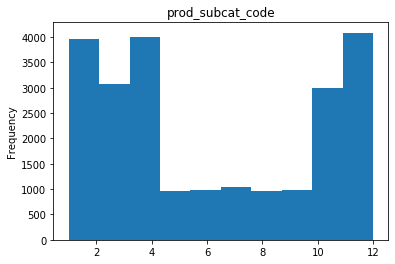

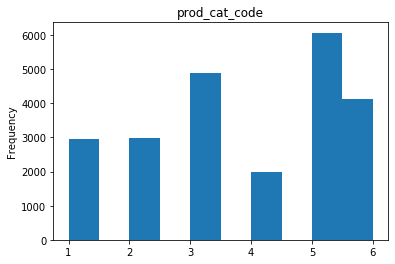

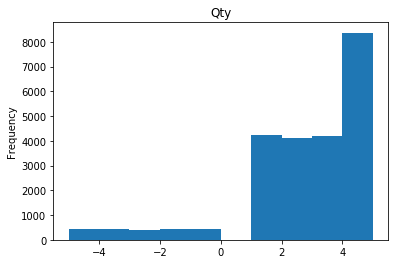

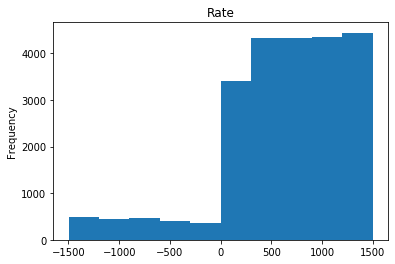

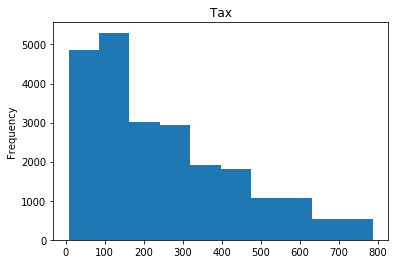

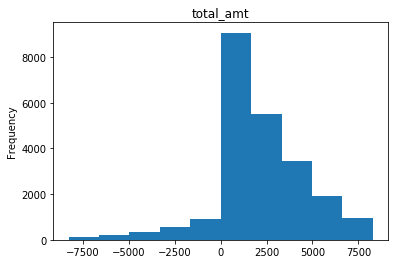

In [86]:
for var in conti_customer.columns:
    conti_customer[var].plot(kind='hist')
    plt.title(var)
    plt.show()

#### Bar chart of categorical variables

In [87]:
category_customer = customer_final.loc[:,customer_final.dtypes=='object']

In [88]:
category_customer.head()

,Store_type,prod_cat,prod_subcat,Gender
0,e-Shop,Clothing,Women,M
1,e-Shop,Electronics,Computers,F
2,TeleShop,Books,DIY,M
3,e-Shop,Home and kitchen,Bath,M
4,TeleShop,Books,DIY,M


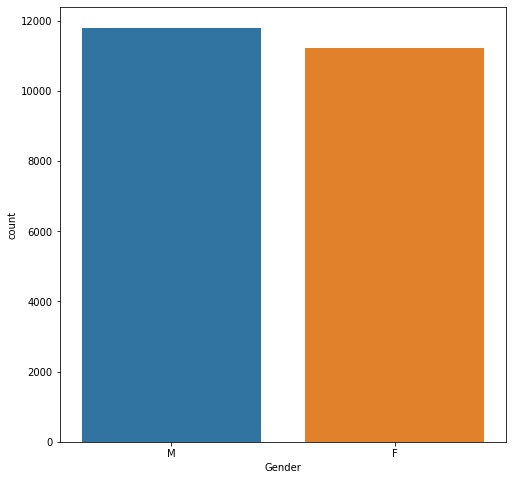

In [89]:
plt.figure(figsize=(8,8))
sns.countplot(category_customer['Gender'])
plt.show()

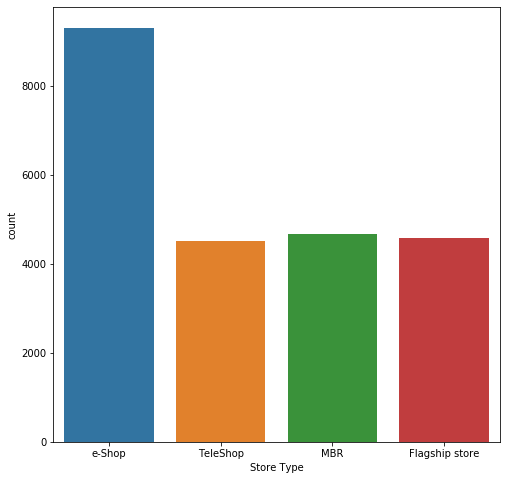

In [90]:
plt.figure(figsize=(8,8))
sns.countplot(category_customer['Store_type'])
plt.xlabel('Store Type')
plt.show()

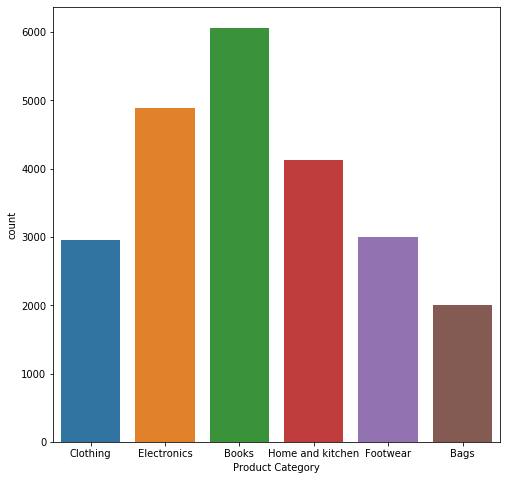

In [91]:
plt.figure(figsize=(8,8))
sns.countplot(category_customer['prod_cat'])
plt.xlabel('Product Category')
plt.show()

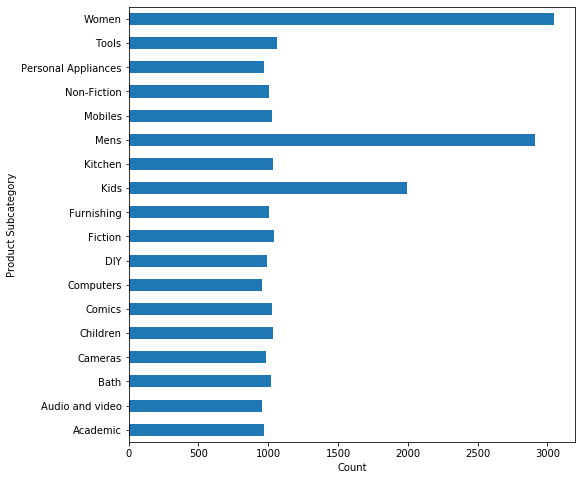

In [92]:
plt.figure(figsize=(8,8))
category_customer.groupby('prod_subcat')['prod_subcat'].count().plot(kind='barh')
plt.xlabel('Count')
plt.ylabel('Product Subcategory')
plt.show()

#### (4) Calculate the following information using the merged dataset:
#### (a) Time period of the available transaction data

In [93]:
customer_final.sort_values(by="tran_date")

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_subcat,customer_Id,DOB,Gender,city_code
22899,36332303449,268624,2011-01-02,10,6,-4,-295,123.900,-1303.900,Flagship store,Home and kitchen,Kitchen,268624,1986-09-18,F,1.0
22893,25374972356,268904,2011-01-02,2,6,5,821,431.025,4536.025,MBR,Home and kitchen,Furnishing,268904,1990-05-25,M,5.0
22894,15662366857,272756,2011-01-02,5,3,3,527,166.005,1747.005,e-Shop,Electronics,Computers,272756,1975-12-03,F,9.0
22895,28972634039,275227,2011-01-02,9,3,-1,-334,35.070,-369.070,MBR,Electronics,Cameras,275227,1989-09-23,M,4.0
22896,60041644943,267309,2011-01-02,3,2,1,392,41.160,433.160,Flagship store,Footwear,Women,267309,1973-04-08,F,1.0
22897,4947037174,271239,2011-01-02,12,6,3,228,71.820,755.820,e-Shop,Home and kitchen,Tools,271239,1981-12-14,M,5.0
22898,13048732855,266900,2011-01-02,4,4,-1,-1098,115.290,-1213.290,e-Shop,Bags,Women,266900,1988-10-27,M,9.0
22911,85848725285,271131,2011-01-02,1,4,5,1043,547.575,5762.575,e-Shop,Bags,Mens,271131,1976-07-02,F,9.0
22900,21830961921,267482,2011-01-02,10,3,4,455,191.100,2011.100,MBR,Electronics,Audio and video,267482,1978-07-29,M,7.0
22891,35789988197,267508,2011-01-02,4,1,3,783,246.645,2595.645,e-Shop,Clothing,Mens,267508,1985-01-19,M,2.0


In [94]:
min_date = customer_final["tran_date"].min()

In [95]:
max_date = customer_final["tran_date"].max()

In [96]:
print("Time period of the available transaction data is from "+ pd.Timestamp.strftime(min_date,format="%d-%m-%Y") + " to " + pd.Timestamp.strftime(max_date,format="%d-%m-%Y"))

Time period of the available transaction data is from 02-01-2011 to 02-12-2014


#### (b) Count of transactions where the total amount of transaction was negative

In [99]:
customer_final.head()

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_subcat,customer_Id,DOB,Gender,city_code
0,80712190438,270351,2014-02-28,1,1,-5,-772,405.300,-4265.300,e-Shop,Clothing,Women,270351,1981-09-26,M,5.0
1,29258453508,270384,2014-02-27,5,3,-5,-1497,785.925,-8270.925,e-Shop,Electronics,Computers,270384,1973-05-11,F,8.0
2,51750724947,273420,2014-02-24,6,5,-2,-791,166.110,-1748.110,TeleShop,Books,DIY,273420,1992-07-27,M,8.0
3,93274880719,271509,2014-02-24,11,6,-3,-1363,429.345,-4518.345,e-Shop,Home and kitchen,Bath,271509,1981-06-08,M,3.0
4,51750724947,273420,2014-02-23,6,5,-2,-791,166.110,-1748.110,TeleShop,Books,DIY,273420,1992-07-27,M,8.0


In [100]:
#count of transaction_ids where total_amt was negative
negative_transaction = customer_final.loc[customer_final["total_amt"] < 0,"transaction_id"].count()

In [55]:
print("Count of transactions where the total amount of transaction was negative is",negative_transaction)

Count of transactions where the total amount of transaction was negative is 2164


#### (5) Analyze which product categories are more popular among females vs male customers

In [56]:
#groupby the data set on the basis of "Gender" and "prod_cat"
product_gender = customer_final.groupby(["Gender","prod_cat"])[["Qty"]].sum().reset_index()

In [57]:
product_gender

,Gender,prod_cat,Qty
0,F,Bags,2364
1,F,Books,7080
2,F,Clothing,3425
3,F,Electronics,5832
4,F,Footwear,3721
5,F,Home and kitchen,4898
6,M,Bags,2346
7,M,Books,7587
8,M,Clothing,3748
9,M,Electronics,6486


In [58]:
#converting to pivot table for better view
product_gender.pivot(index="Gender",columns="prod_cat",values="Qty")

prod_cat,Bags,Books,Clothing,Electronics,Footwear,Home and kitchen
Gender,,,,,,
F,2364,7080,3425,5832,3721,4898
M,2346,7587,3748,6486,3561,5051


Products that are popular among males are:

Books
Clothing
Electronics
Home and kitchen
Products that are popular among females are:
    Bags
    Footwear

#### (6) Which City code has the maximum customers and what was the percentage of customers from that city?

In [59]:
customer_final.head(2)

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_subcat,customer_Id,DOB,Gender,city_code
0,80712190438,270351,2014-02-28,1,1,-5,-772,405.300,-4265.300,e-Shop,Clothing,Women,270351,1981-09-26,M,5.0
1,29258453508,270384,2014-02-27,5,3,-5,-1497,785.925,-8270.925,e-Shop,Electronics,Computers,270384,1973-05-11,F,8.0


In [101]:
customer_group = customer_final.groupby('city_code')['customer_Id'].count().sort_values(ascending =False)

In [61]:
customer_group

city_code
4.0     2422
3.0     2410
5.0     2357
7.0     2356
10.0    2333
8.0     2328
2.0     2268
1.0     2255
9.0     2176
6.0     2127
Name: customer_Id, dtype: int64

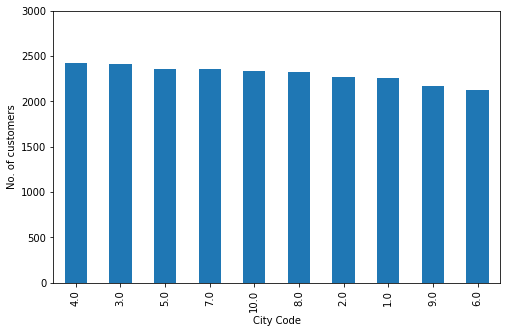

In [62]:
plt.figure(figsize=(8,5))
customer_group.plot(kind="bar")
plt.xlabel("City Code")
plt.ylabel("No. of customers")
plt.yticks(np.arange(0, 3500, step=500))
plt.show()

In [114]:
percentage = round((customer_group[4.0] / customer_group.sum()) * 100,2)

In [115]:
percentage

10.52

In [116]:
print("City code 4.0 has the maximum customers and the percentage of customers from that city is ",percentage)

City code 4.0 has the maximum customers and the percentage of customers from that city is  10.52


##### (7) Which store type sells the maximum products by value and by quantity?

In [117]:
customer_final.head(2)

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_subcat,customer_Id,DOB,Gender,city_code
0,80712190438,270351,2014-02-28,1,1,-5,-772,405.300,-4265.300,e-Shop,Clothing,Women,270351,1981-09-26,M,5.0
1,29258453508,270384,2014-02-27,5,3,-5,-1497,785.925,-8270.925,e-Shop,Electronics,Computers,270384,1973-05-11,F,8.0


In [118]:
customer_final.groupby("Store_type")["Qty","Rate"].sum().sort_values(by="Qty",ascending=False)

,Qty,Rate
Store_type,,
e-Shop,22790,5945770
MBR,11195,2953665
Flagship store,11142,2942874
TeleShop,10993,2836359


In [119]:
print('e-Shop store sell the maximum products by value and by quantity')

e-Shop store sell the maximum products by value and by quantity


#### (8) What was the total amount earned from the "Electronics" and "Clothing" categories from Flagship Stores?

In [120]:
store_group = round(customer_final.pivot_table(index = "prod_cat",columns="Store_type",
                                               values="total_amt", aggfunc='sum'),2)

In [121]:
store_group

Store_type,Flagship store,MBR,TeleShop,e-Shop
prod_cat,,,,
Bags,870548.83,848678.68,789181.06,1617933.27
Books,2493677.81,2496039.20,2545714.47,5297161.15
Clothing,1194423.23,1287686.34,1241834.36,2527193.57
Electronics,2215136.04,2107969.82,1978457.19,4429142.77
Footwear,1234806.56,1112163.72,1235719.29,2643215.25
Home and kitchen,1713004.15,1822403.57,1581227.37,3327977.12


In [122]:
store_group.loc[["Clothing","Electronics"],"Flagship store"]

prod_cat
Clothing       1194423.23
Electronics    2215136.04
Name: Flagship store, dtype: float64

In [123]:
# if we have to find total amount of both 'Clothing' and 'Electronics' from ' Flagship Store'
store_group.loc[["Clothing","Electronics"],"Flagship store"].sum()

3409559.27

#### (9) What was the total amount earned from "Male" customers under the "Electronics" category?

In [124]:
gender_group = round(customer_final.pivot_table(index = "prod_cat",columns="Gender", values="total_amt", aggfunc='sum'),2)

In [125]:
gender_group

Gender,F,M
prod_cat,,
Bags,2079618.84,2046722.99
Books,6174590.82,6645972.77
Clothing,3026750.80,3224079.50
Electronics,5019354.21,5711351.62
Footwear,3203155.21,3020200.37
Home and kitchen,4133702.23,4305169.51


In [130]:
male_earning = gender_group.loc["Electronics","M"]

In [131]:
print("The total amount earned from Male customers under the Electronics category is",male_earning)

The total amount earned from Male customers under the Electronics category is 5711351.62


#### (10) How many customers have more than 10 unique transactions, after removing all transactions which have any negative amounts?

In [132]:
#creating a new dataframe that does not contain transactions with negative values
pos_trans = customer_final.loc[customer_final["total_amt"]>0,:]

In [133]:
pos_trans

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_subcat,customer_Id,DOB,Gender,city_code
10,29258453508,270384,2014-02-20,5,3,5,1497,785.925,8270.925,e-Shop,Electronics,Computers,270384,1973-05-11,F,8.0
11,25455265351,267750,2014-02-20,12,6,3,1360,428.400,4508.400,e-Shop,Home and kitchen,Tools,267750,1986-10-13,M,1.0
12,1571002198,275023,2014-02-20,6,5,4,587,246.540,2594.540,e-Shop,Books,DIY,275023,1971-03-09,M,6.0
14,36554696014,269345,2014-02-20,3,5,3,1253,394.695,4153.695,e-Shop,Books,Comics,269345,1970-06-26,F,10.0
15,56814940239,268799,2014-02-20,7,5,5,368,193.200,2033.200,e-Shop,Books,Fiction,268799,1979-06-27,M,9.0
16,54295803788,270787,2014-02-20,12,5,5,584,306.600,3226.600,e-Shop,Books,Academic,270787,1973-09-10,F,6.0
17,25963520987,274829,2014-02-20,4,4,3,502,158.130,1664.130,Flagship store,Bags,Women,274829,1984-09-05,F,2.0
18,17183929085,266863,2014-02-20,1,2,1,1359,142.695,1501.695,TeleShop,Footwear,Mens,266863,1972-11-17,M,6.0
19,44783317894,269452,2014-02-20,3,1,3,825,259.875,2734.875,TeleShop,Clothing,Kids,269452,1979-09-18,F,2.0
20,58957828601,269009,2014-02-20,11,5,4,846,355.320,3739.320,TeleShop,Books,Children,269009,1977-07-12,M,2.0


In [139]:
# creating a dataframe that contains unique transactions 
unique_trans = pos_trans.groupby(['customer_Id','prod_cat','prod_subcat'])['transaction_id'].count().reset_index()

In [135]:
unique_trans

,customer_Id,prod_cat,prod_subcat,transaction_id
0,266783,Books,Non-Fiction,1
1,266783,Clothing,Mens,2
2,266783,Footwear,Mens,1
3,266784,Books,Fiction,1
4,266784,Books,Non-Fiction,1
5,266784,Electronics,Mobiles,1
6,266785,Bags,Mens,1
7,266785,Books,Children,1
8,266785,Footwear,Kids,2
9,266785,Footwear,Mens,2


In [141]:
# now finding the customers which have unique transactions greater than 10
unique_trans_count = unique_trans.groupby('customer_Id')['transaction_id'].count().reset_index()

In [142]:
unique_trans_count.head()

,customer_Id,transaction_id
0,266783,3
1,266784,3
2,266785,5
3,266788,4
4,266794,8


In [143]:
unique_trans_count[unique_trans_count['transaction_id'] > 10]

,customer_Id,transaction_id


In [144]:
print('There are no unique transactions greater than 10')

There are no unique transactions greater than 10


##### (11) For all customers aged between 25-35, find out:
#### (a) What was the total amount spent for 'Electronics' and 'Books' product categories?

Adding new column 'age'

In [86]:
now = pd.Timestamp('now')
customer_final['DOB'] = pd.to_datetime(customer_final['DOB'], format='%m%d%y')    # 1
customer_final['DOB'] = customer_final['DOB'].where(customer_final['DOB'] < now, customer_final['DOB'] -  np.timedelta64(100, 'Y'))   # 2
customer_final['AGE'] = (now - customer_final['DOB']).astype('<m8[Y]')

In [87]:
customer_final.head()

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_subcat,customer_Id,DOB,Gender,city_code,AGE
0,80712190438,270351,2014-02-28,1,1,-5,-772,405.300,-4265.300,e-Shop,Clothing,Women,270351,1981-09-26,M,5.0,38.0
1,29258453508,270384,2014-02-27,5,3,-5,-1497,785.925,-8270.925,e-Shop,Electronics,Computers,270384,1973-05-11,F,8.0,46.0
2,51750724947,273420,2014-02-24,6,5,-2,-791,166.110,-1748.110,TeleShop,Books,DIY,273420,1992-07-27,M,8.0,27.0
3,93274880719,271509,2014-02-24,11,6,-3,-1363,429.345,-4518.345,e-Shop,Home and kitchen,Bath,271509,1981-06-08,M,3.0,38.0
4,51750724947,273420,2014-02-23,6,5,-2,-791,166.110,-1748.110,TeleShop,Books,DIY,273420,1992-07-27,M,8.0,27.0


as we have to deal with customers aged between 25-35, so creating new column 'Age_cat'

In [88]:
customer_final['Age_cat'] = pd.cut(customer_final['AGE'],bins=[24,35,46,57],labels=['25-35','36-46','47-57'],include_lowest=True)

In [89]:
customer_final.head()

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_subcat,customer_Id,DOB,Gender,city_code,AGE,Age_cat
0,80712190438,270351,2014-02-28,1,1,-5,-772,405.300,-4265.300,e-Shop,Clothing,Women,270351,1981-09-26,M,5.0,38.0,36-46
1,29258453508,270384,2014-02-27,5,3,-5,-1497,785.925,-8270.925,e-Shop,Electronics,Computers,270384,1973-05-11,F,8.0,46.0,36-46
2,51750724947,273420,2014-02-24,6,5,-2,-791,166.110,-1748.110,TeleShop,Books,DIY,273420,1992-07-27,M,8.0,27.0,25-35
3,93274880719,271509,2014-02-24,11,6,-3,-1363,429.345,-4518.345,e-Shop,Home and kitchen,Bath,271509,1981-06-08,M,3.0,38.0,36-46
4,51750724947,273420,2014-02-23,6,5,-2,-791,166.110,-1748.110,TeleShop,Books,DIY,273420,1992-07-27,M,8.0,27.0,25-35


In [90]:
# grouping the dataframe 'customer_final' on the basis of 'Age_cat' and 'prod_cat'
customer_25_35 = customer_final.groupby(['Age_cat','prod_cat'])['total_amt'].sum()

In [91]:
customer_25_35

Age_cat  prod_cat        
25-35    Bags                1531459.280
         Books               4768585.510
         Clothing            2586771.850
         Electronics         4253306.330
         Footwear            2380744.600
         Home and kitchen    3234133.890
36-46    Bags                2018753.230
         Books               6340592.765
         Clothing            2934043.515
         Electronics         4976742.095
         Footwear            2963801.165
         Home and kitchen    4131187.255
47-57    Bags                 576129.320
         Books               1723414.355
         Clothing             730322.125
         Electronics         1500657.405
         Footwear             881359.050
         Home and kitchen    1079291.070
Name: total_amt, dtype: float64

In [92]:
customer_25_35.loc['25-35',['Books','Electronics']]

Age_cat  prod_cat   
25-35    Books          4768585.51
         Electronics    4253306.33
Name: total_amt, dtype: float64

In [93]:
print("Total amount spent on 'Electronics' and 'Books' product categories is", 
      customer_25_35.loc['25-35',['Books','Electronics']].sum().round(2))

Total amount spent on 'Electronics' and 'Books' product categories is 9021891.84


#### (b) What was the total amount spent by these customers between 1st Jan 2014 to 1st Mar 2014?

In [94]:
customer_final.head()

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_subcat,customer_Id,DOB,Gender,city_code,AGE,Age_cat
0,80712190438,270351,2014-02-28,1,1,-5,-772,405.300,-4265.300,e-Shop,Clothing,Women,270351,1981-09-26,M,5.0,38.0,36-46
1,29258453508,270384,2014-02-27,5,3,-5,-1497,785.925,-8270.925,e-Shop,Electronics,Computers,270384,1973-05-11,F,8.0,46.0,36-46
2,51750724947,273420,2014-02-24,6,5,-2,-791,166.110,-1748.110,TeleShop,Books,DIY,273420,1992-07-27,M,8.0,27.0,25-35
3,93274880719,271509,2014-02-24,11,6,-3,-1363,429.345,-4518.345,e-Shop,Home and kitchen,Bath,271509,1981-06-08,M,3.0,38.0,36-46
4,51750724947,273420,2014-02-23,6,5,-2,-791,166.110,-1748.110,TeleShop,Books,DIY,273420,1992-07-27,M,8.0,27.0,25-35


In [95]:
# filtering out data that belongs to the 'age_cat' = 25-35
customer_total_amount_25_35 = customer_final[customer_final['Age_cat']=='25-35']

In [96]:
customer_total_amount_25_35.head()

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_subcat,customer_Id,DOB,Gender,city_code,AGE,Age_cat
2,51750724947,273420,2014-02-24,6,5,-2,-791,166.110,-1748.110,TeleShop,Books,DIY,273420,1992-07-27,M,8.0,27.0,25-35
4,51750724947,273420,2014-02-23,6,5,-2,-791,166.110,-1748.110,TeleShop,Books,DIY,273420,1992-07-27,M,8.0,27.0,25-35
11,25455265351,267750,2014-02-20,12,6,3,1360,428.400,4508.400,e-Shop,Home and kitchen,Tools,267750,1986-10-13,M,1.0,33.0,25-35
13,43134751727,268487,2014-02-20,3,2,-1,-611,64.155,-675.155,e-Shop,Footwear,Women,268487,1984-06-10,F,2.0,35.0,25-35
17,25963520987,274829,2014-02-20,4,4,3,502,158.130,1664.130,Flagship store,Bags,Women,274829,1984-09-05,F,2.0,35.0,25-35


In [97]:
# getting all the data with transaction date between 1st Jan 2014 to 1st Mar 2014?
total_amount = customer_total_amount_25_35[(customer_total_amount_25_35['tran_date'] >='2014-01-01') & (customer_total_amount_25_35['tran_date'] <='2014-03-01')]

In [98]:
total_amount

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_subcat,customer_Id,DOB,Gender,city_code,AGE,Age_cat
2,51750724947,273420,2014-02-24,6,5,-2,-791,166.110,-1748.110,TeleShop,Books,DIY,273420,1992-07-27,M,8.0,27.0,25-35
4,51750724947,273420,2014-02-23,6,5,-2,-791,166.110,-1748.110,TeleShop,Books,DIY,273420,1992-07-27,M,8.0,27.0,25-35
11,25455265351,267750,2014-02-20,12,6,3,1360,428.400,4508.400,e-Shop,Home and kitchen,Tools,267750,1986-10-13,M,1.0,33.0,25-35
13,43134751727,268487,2014-02-20,3,2,-1,-611,64.155,-675.155,e-Shop,Footwear,Women,268487,1984-06-10,F,2.0,35.0,25-35
17,25963520987,274829,2014-02-20,4,4,3,502,158.130,1664.130,Flagship store,Bags,Women,274829,1984-09-05,F,2.0,35.0,25-35
23,91116291703,268509,2014-02-20,1,2,4,1243,522.060,5494.060,MBR,Footwear,Mens,268509,1989-08-17,M,10.0,30.0,25-35
28,88853694830,268444,2014-02-20,4,4,-3,-80,25.200,-265.200,MBR,Bags,Women,268444,1992-01-02,F,6.0,28.0,25-35
29,99581788104,267466,2014-02-20,3,2,1,96,10.080,106.080,Flagship store,Footwear,Women,267466,1987-08-06,F,7.0,32.0,25-35
31,22391667321,270842,2014-02-19,1,2,5,723,379.575,3994.575,MBR,Footwear,Mens,270842,1984-12-07,M,2.0,35.0,25-35
37,31384765864,267058,2014-02-19,3,2,1,793,83.265,876.265,e-Shop,Footwear,Women,267058,1992-02-06,F,10.0,28.0,25-35


In [99]:
print('The total amount spent by customers aged 25-35 between 1st Jan 2014 to 1st Mar 2014 is',
      total_amount['total_amt'].sum())

The total amount spent by customers aged 25-35 between 1st Jan 2014 to 1st Mar 2014 is 603037.175
